# Extracción de patrones

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Diciembre de 2024  
**Versión:** 1.0  

---

## Descripción

Este notebook trabaja sobre la extracción de patrones

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (2.2.2)
- numpy (1.26.4)
- matplotlib (3.8.0)
- seaborn (0.13.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# MARKET BASKET ANALYSIS
**Market basket analysis** es una técnica de extracción de datos utilizada por los retail para aumentar las ventas mediante una mejor comprensión de los patrones de compra de los clientes. Implica analizar grandes conjuntos de datos, como el historial de compras, para revelar grupos de productos, así como productos que probablemente se compren juntos

P.ej. la regla **{pepinos, tomates} -> {aceite de girasol}** encontrada en los datos de ventas de un supermercado indicaría que si un cliente compra pepinos y tomates juntos, es probable que también compre aceite de girasol.

# 1. Importar Librerías


In [1]:
!pip install squarify

In [12]:
import numpy as np
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import warnings

import nest_asyncio
nest_asyncio.apply()
warnings.filterwarnings("ignore", category=DeprecationWarning)
# for market basket analysis
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


# 2. Lectura de Datos

In [ ]:
#!pip install --upgrade ipykernel

In [3]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/Mineria_de_datos/master/datos/2.1.3_Market_Basket_Optimization.csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--2024-12-27 00:19:09--  https://raw.githubusercontent.com/JaznaLaProfe/Mineria_de_datos/master/datos/2.1.3_Market_Basket_Optimization.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 302908 (296K) [text/plain]
Saving to: ‘2.1.3_Market_Basket_Optimization.csv’

2.1.3_Market_Basket 100%[===================>] 295.81K  --.-KB/s    in 0.007s  

2024-12-27 00:19:09 (39.2 MB/s) - ‘2.1.3_Market_Basket_Optimization.csv’ saved [302908/302908]



In [13]:
df = pd.read_csv('2.1.3_Market_Basket_Optimization.csv', header = None)

In [14]:
df.head(5) # buscando las primeras 5 filas en el conjunto de datos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.shape

(7501, 20)

In [16]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')

# 3. Visualizando datos
Aquí se decidio contar todos los valores únicos en todas las columnas y crear algunas visualizaciones.
Por ejemplo, si se tienen 5 'almendras' en la primera columna, 3 'almendras' en la segunda columna, tendremos 8 'almendras' en total.

In [17]:
# Crea un DataFrame vacío para almacenar el resultado
df_res = pd.DataFrame()

# Crea una lista para almacenar los DataFrames de conteo
dfs = []

# Itera sobre las columnas del DataFrame original
for col in df.columns:
    # Obtiene la serie de conteo de valores para cada columna
    value_counts = df[col].value_counts()
    # Convierte la serie en un DataFrame y se transpone para que las filas sean columnas
    df_vc = value_counts.to_frame().T
    # Agrega el DataFrame de conteo a la lista
    dfs.append(df_vc)

# Concatena todos los DataFrames de la lista en uno solo
df_res = pd.concat(dfs, ignore_index=True)

In [18]:
df_res

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,cauliflower,ketchup,cream,body spray,oatmeal,zucchini,tea,water spray,napkins,asparagus
0,577.0,576.0,458.0,391.0,373.0,354.0,325.0,293.0,279.0,270.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,484.0,78.0,11.0,223.0,234.0,411.0,153.0,78.0,302.0,101.0,...,1.0,5.0,1.0,13.0,4.0,10.0,5.0,1.0,NaN,NaN
2,375.0,NaN,NaN,174.0,87.0,279.0,48.0,21.0,225.0,50.0,...,1.0,2.0,1.0,14.0,5.0,2.0,4.0,1.0,NaN,NaN
3,201.0,NaN,NaN,143.0,18.0,167.0,9.0,1.0,181.0,55.0,...,3.0,6.0,1.0,9.0,6.0,9.0,1.0,1.0,1.0,NaN
4,84.0,NaN,NaN,115.0,2.0,62.0,NaN,NaN,134.0,45.0,...,4.0,3.0,1.0,15.0,2.0,17.0,4.0,NaN,2.0,NaN
5,44.0,NaN,NaN,71.0,1.0,23.0,1.0,NaN,102.0,28.0,...,9.0,5.0,2.0,9.0,5.0,6.0,3.0,NaN,NaN,NaN
6,14.0,NaN,NaN,36.0,NaN,8.0,NaN,NaN,59.0,17.0,...,4.0,3.0,NaN,10.0,2.0,7.0,4.0,NaN,NaN,NaN
7,5.0,NaN,NaN,38.0,NaN,2.0,NaN,NaN,28.0,15.0,...,1.0,3.0,NaN,3.0,2.0,5.0,3.0,NaN,1.0,1.0
8,2.0,NaN,NaN,18.0,NaN,NaN,NaN,NaN,19.0,8.0,...,5.0,NaN,NaN,5.0,3.0,10.0,2.0,NaN,NaN,NaN
9,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,10.0,5.0,...,4.0,1.0,NaN,5.0,3.0,2.0,1.0,NaN,1.0,NaN


In [ ]:
df_res.shape

(20, 120)

In [19]:
# 1. Convertir todas las celdas del DataFrame a una lista única de productos
productos = df.values.flatten()  # Convierte todo el DataFrame en una lista 1D
productos_unicos = set(productos)  # Usa un conjunto para eliminar duplicados

# 2. Filtrar valores nulos o vacíos, si los hay
productos_unicos = {producto for producto in productos_unicos if pd.notna(producto) and producto != ''}

print(f"Total de productos únicos: {len(productos_unicos)}")
print(productos_unicos)

Total de productos únicos: 120
{'clothes accessories', 'bug spray', 'dessert wine', 'chocolate', 'sandwich', 'hand protein bar', 'burgers', 'oil', 'cooking oil', 'rice', 'whole weat flour', 'frozen smoothie', 'tomato juice', 'yogurt cake', 'barbecue sauce', 'salad', 'cottage cheese', 'chili', 'chocolate bread', 'pasta', 'zucchini', 'grated cheese', 'magazines', 'flax seed', 'brownies', 'vegetables mix', 'shallot', 'tomato sauce', 'cream', 'cider', 'pet food', 'fresh tuna', 'light cream', 'cookies', 'eggs', 'oatmeal', 'champagne', 'carrots', 'milk', 'protein bar', 'cauliflower', 'mint green tea', 'melons', 'napkins', 'french fries', 'blueberries', 'fromage blanc', 'cereals', 'avocado', 'gluten free bar', 'salmon', 'light mayo', 'tea', 'pickles', 'whole wheat rice', 'soup', 'mineral water', 'strawberries', 'eggplant', 'antioxydant juice', 'black tea', 'herb & pepper', 'chutney', 'mayonnaise', 'spaghetti', 'mashed potato', 'shampoo', 'toothpaste', 'salt', 'ham', 'chicken', 'ketchup', 'can

In [20]:
df_sum = df_res.sum()
df_sum = df_sum.sort_values(ascending=False)

In [21]:
df_sum

,0
mineral water,1788.0
eggs,1348.0
spaghetti,1306.0
french fries,1282.0
chocolate,1230.0
...,...
bramble,14.0
cream,7.0
napkins,5.0
water spray,3.0


Después de contar todos los valores en todas las columnas, es posible construir un **gráfico de frecuencia**.

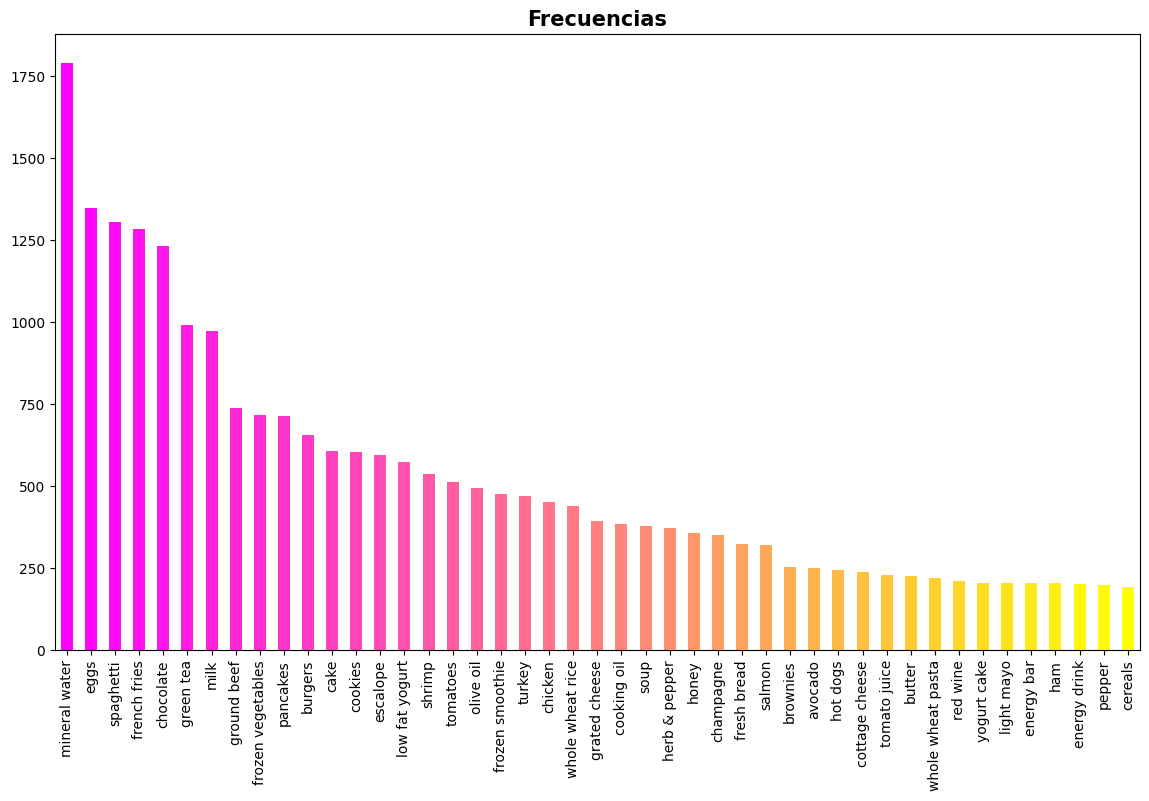

In [22]:
plt.figure(figsize=(14,8))
plt.title("Frecuencias", fontsize=15, fontweight="bold")
cnt = 45 # plot only first 'cnt' values
color = plt.cm.spring(np.linspace(0, 1, cnt))
df_sum.head(cnt).plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.grid(False)
plt.axis('on')
plt.show()

También podemos trazar frecuencias, pero en forma de **mapa de calor**:

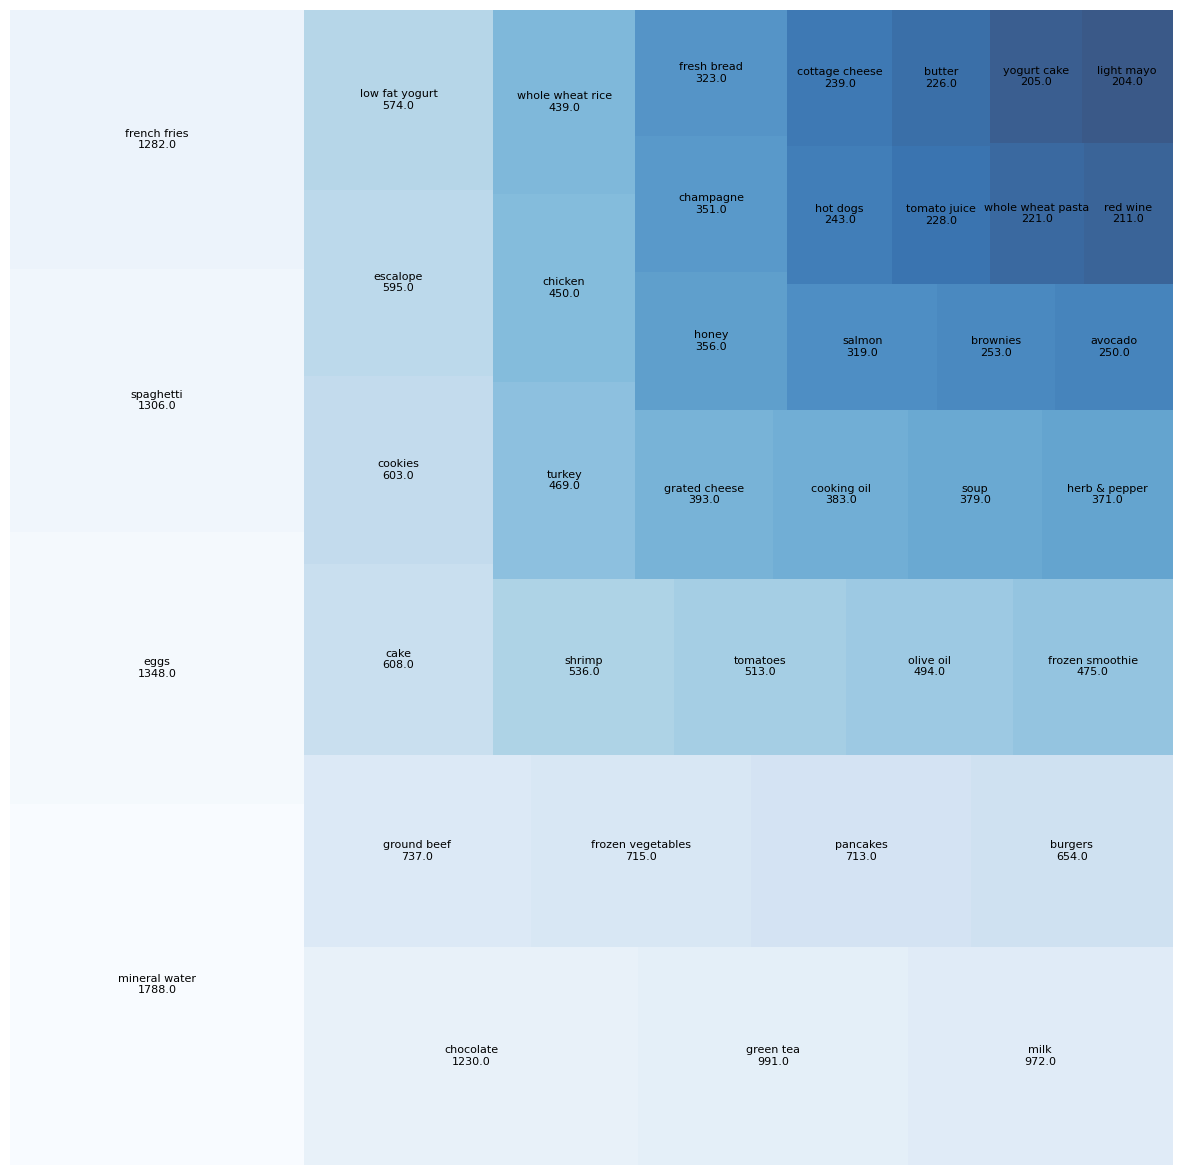

In [28]:
plt.figure(figsize=(15,15))
cnt = 40 # plot only first 'cnt' values
color = plt.cm.Blues(np.linspace(0, 1, cnt))
df_part = df_sum.head(cnt)
# Crear etiquetas combinando índices (nombres) con valores (frecuencias)
labels = [f"{index}\n{value}" for index, value in zip(df_part.index, df_part.values)]

squarify.plot(sizes = df_part.values, label = labels, alpha=.8, color = color,
              text_kwargs={'fontsize':8})
plt.axis('off')
plt.show()

# 4. Transformación de datos
Antes de convertir el conjunto de datos a la vista de transacciones, se debe convertir pandas-data en list-data y luego list-data en numpy-data.

In [29]:
# making each customers shopping items an identical list
arreglo = []
for i in range(df.shape[0]):
    arreglo.append([str(df.values[i,j]) for j in range(df.shape[1])])

arreglo = np.array(arreglo)
print(arreglo.shape)

(7501, 20)


In [30]:
arreglo

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

Y ahora podemos convertir nuestro conjunto de datos a **vista de transacciones**.

In [32]:
te = TransactionEncoder()
data = te.fit_transform(arreglo)
data = pd.DataFrame(data, columns = te.columns_)
print(data.shape)

(7501, 121)


Chequeamos los resultados:

In [33]:
data.head(3)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Como podemos ver, tenemos **columnas con 'nan' **, por lo que deberíamos eliminarla, porque estos son simplemente valores 'no numéricos', que sólo eran celdas vacías en el conjunto de datos original.

In [34]:
data.columns == 'nan'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [35]:
data = data.drop(columns=['nan'])
data.head(3)

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
data.shape

(7501, 120)

# 5. Analizando datos con la regla "apriori"
El algoritmo "apriori" supone que cualquier subconjunto de un conjunto de elementos frecuentes debe ser frecuente. Es el algoritmo detrás del análisis de la cesta de la compra. Digamos que una transacción que contiene {Uvas, Manzana, Mango} también contiene {Uvas, Mango}. Entonces, según el principio de Apriori, si {Uvas, Manzana, Mango} es frecuente, entonces {Uvas, Mango} también debe ser frecuente [[2]](https://www.kdnuggets.com/2019/12/análisis-de-la-cesta-de-mercado.html).

**Support:** Es la popularidad predeterminada de un artículo. En términos matemáticos, el soporte del elemento A no es más que la relación entre las transacciones que involucran a A y el número total de transacciones.
*Support(Uvas) = (Transacciones que involucran Uvas)/(Transacción total)* [[2]](https://www.kdnuggets.com/2019/12/market-basket-analysis.html).

**Confianza:** Probabilidad de que el cliente haya comprado A y B. Se divide el número de transacciones que involucran a A y B por el número de transacciones que involucran a B.
*Confianza(A => B) = (Transacciones que involucran tanto a A como a B)/(Transacciones que involucran solo a A)* [[2]](https://www.kdnuggets.com/2019/12/market-basket-analysis .html).

Entonces, ahora usaremos la **regla a priori** para encontrar algunas dependencias. [Aquí](http://rasbt.github.io/mlxtend/api_modules/mlxtend.frequent_patterns/apriori/) puedes leer más al respecto.

In [ ]:
freq_rules = apriori(data, min_support = 0.01, use_colnames = True)
freq_rules

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, mineral water, milk)"
253,0.017064,"(ground beef, spaghetti, mineral water)"
254,0.015731,"(spaghetti, mineral water, milk)"
255,0.010265,"(spaghetti, mineral water, olive oil)"


Entonces, aquí podemos ver todas las reglas que tienen un soporte mínimo de 0,01.
Si se necesita **reglas con cierta longitud**, se puede filtrar los resultados:

In [ ]:
freq_rules['length'] = freq_rules['itemsets'].apply(lambda x: len(x)) # adding 'length' column
freq_rules

,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
252,0.011065,"(mineral water, milk, ground beef)",3
253,0.017064,"(mineral water, spaghetti, ground beef)",3
254,0.015731,"(mineral water, spaghetti, milk)",3
255,0.010265,"(mineral water, olive oil, spaghetti)",3


In [ ]:
# creando una máscara para filtrar con cierta condición
mask = freq_rules['length'] > 1
# aplica la máscara
filtered_freq_rules = freq_rules.loc[mask]
# imprime el resultado filtrado
filtered_freq_rules

,support,itemsets,length
75,0.011598,"(mineral water, avocado)",2
76,0.011465,"(cake, burgers)",2
77,0.017064,"(chocolate, burgers)",2
78,0.028796,"(eggs, burgers)",2
79,0.021997,"(burgers, french fries)",2
...,...,...,...
252,0.011065,"(mineral water, milk, ground beef)",3
253,0.017064,"(mineral water, spaghetti, ground beef)",3
254,0.015731,"(mineral water, spaghetti, milk)",3
255,0.010265,"(mineral water, olive oil, spaghetti)",3


Entonces, al final es posible ver todas las reglas, que tienen cierta longitud y que tienen cierto soporte mínimo.

# 6. Conclusión
Cada vez más organizaciones están descubriendo formas de utilizar el análisis de la cesta de la compra para obtener información útil sobre asociaciones y relaciones ocultas.


